In [2]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
train=pd.read_csv("train_house.csv")
test=pd.read_csv("test_house.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data=["train","test"]

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
train[['MSZoning','SalePrice']].groupby(['MSZoning'],as_index=False).mean().sort_values(by='SalePrice',ascending=False)

,MSZoning,SalePrice
1,FV,214014.061538
3,RL,191004.994787
2,RH,131558.375000
4,RM,126316.830275
0,C (all),74528.000000


In [9]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [10]:
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

In [11]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

the skew is :  1.8828757597682129


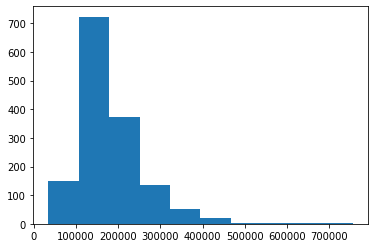

Skew is now :  0.12134661989685333


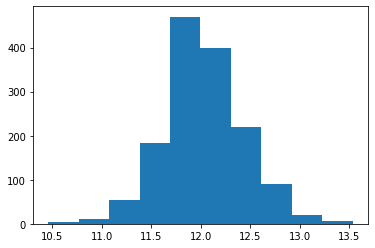

In [12]:
#determining the skewness
print("the skew is : ",train.SalePrice.skew())

plt.hist(train.SalePrice)
plt.show()
train["skew_sp"]=np.log(train["SalePrice"]+1)
print("Skew is now : ",train.skew_sp.skew())
plt.hist(train.skew_sp)
plt.show()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

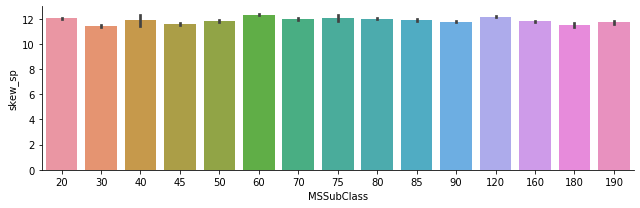

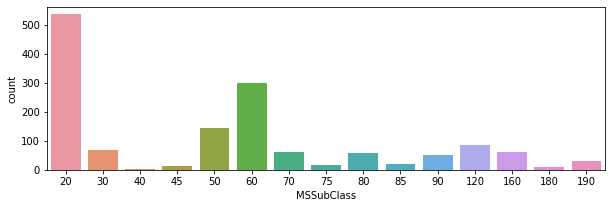

In [20]:
sns.factorplot('MSSubClass', 'skew_sp', data=train,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot('MSSubClass', data=train)
train['MSSubClass'].value_counts()


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

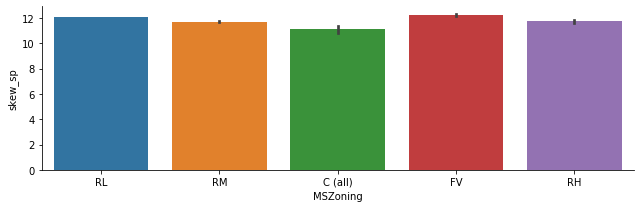

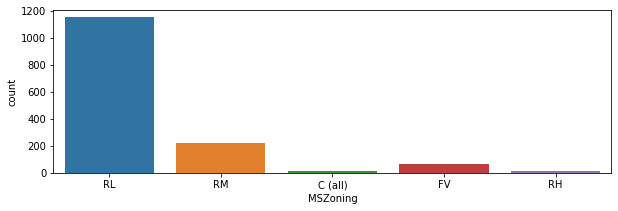

In [22]:
sns.factorplot('MSZoning', 'skew_sp', data=train,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot('MSZoning', data=train)
train['MSZoning'].value_counts()


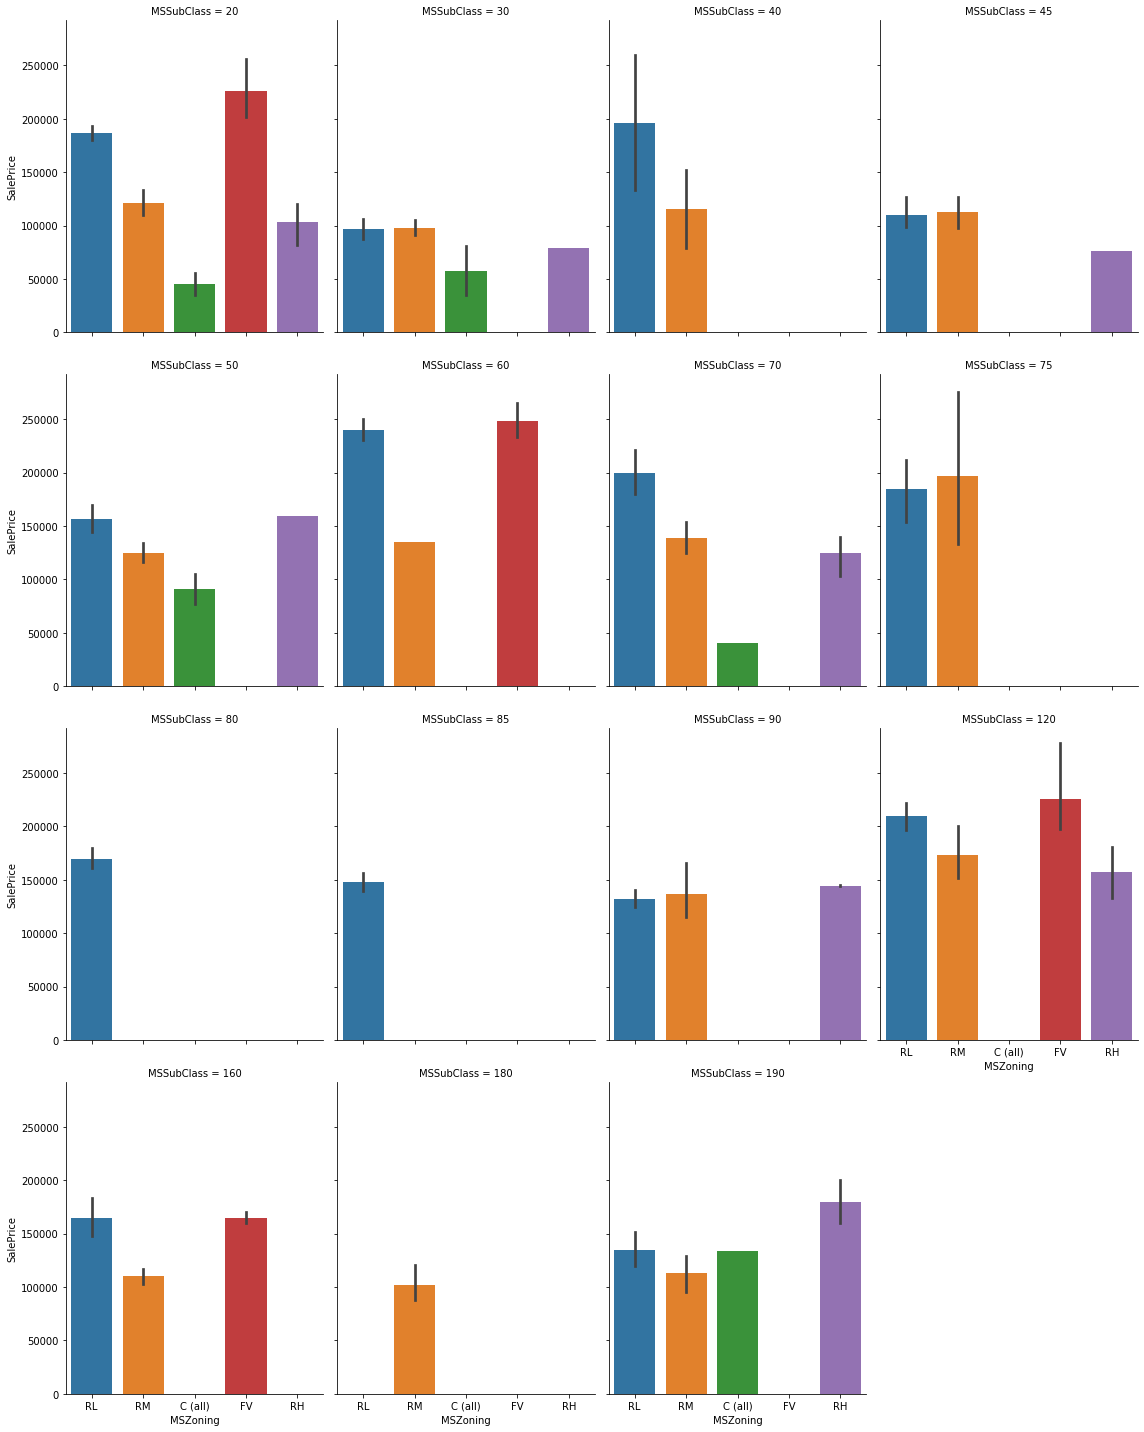

In [26]:
sns.factorplot(x='MSZoning',y='SalePrice',col='MSSubClass',data=train,kind='bar',col_wrap=4,aspect=0.8)

In [29]:
numerical=train.select_dtypes(include=[np.number])
print(numerical.dtypes)

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
skew_sp          float64
dtype: object


In [46]:
corr=numerical.corr(method='spearman')
print(corr['SalePrice'].sort_values(ascending=False)[:],'\n')

skew_sp          1.000000
SalePrice        1.000000
OverallQual      0.809829
GrLivArea        0.731310
GarageCars       0.690711
YearBuilt        0.652682
GarageArea       0.649379
FullBath         0.635957
TotalBsmtSF      0.602725
GarageYrBlt      0.593788
1stFlrSF         0.575408
YearRemodAdd     0.571159
TotRmsAbvGrd     0.532586
Fireplaces       0.519247
OpenPorchSF      0.477561
LotArea          0.456461
MasVnrArea       0.421309
LotFrontage      0.409076
WoodDeckSF       0.353802
HalfBath         0.343008
BsmtFinSF1       0.301871
2ndFlrSF         0.293598
BedroomAbvGr     0.234907
BsmtFullBath     0.225125
BsmtUnfSF        0.185197
ScreenPorch      0.100070
MoSold           0.069432
3SsnPorch        0.065440
PoolArea         0.058453
MSSubClass       0.007192
BsmtHalfBath    -0.012189
Id              -0.018546
YrSold          -0.029899
BsmtFinSF2      -0.038806
MiscVal         -0.062727
LowQualFinSF    -0.067719
OverallCond     -0.129325
KitchenAbvGr    -0.164826
EnclosedPorc

now we will analyze the features in their descending correlations

In [35]:
quality_table=train.pivot_table(index='OverallQual',values='SalePrice',aggfunc=np.median)
quality_table

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


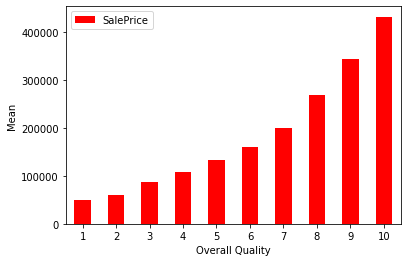

In [37]:
quality_table.plot(kind='bar',color='red')
plt.xlabel('Overall Quality')
plt.ylabel('Mean')
plt.xticks(rotation=0)
plt.show()

We can see that the Sale price varies proportionally to the quality of the house

Now we analyze the GriLivArea without the outliers

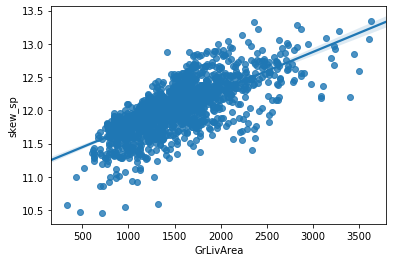

In [42]:
train = train[train['GrLivArea'] < 4000]
sns.regplot(x='GrLivArea',y='skew_sp',data=train)

We now analyze the garage area again without outliers(<1200)

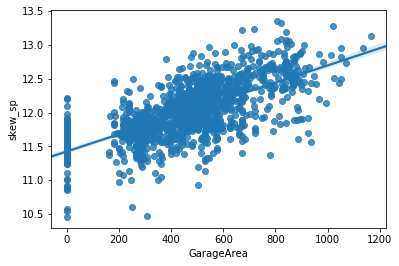

In [43]:
train = train[train['GarageArea'] < 1200]
sns.regplot(x='GarageArea',y='skew_sp',data=train)

In [44]:
train['Condition1'].value_counts()

Norm      1255
Feedr       80
Artery      48
RRAn        26
PosN        17
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [45]:
train['Condition2'].value_counts()

Norm      1439
Feedr        6
Artery       2
RRNn         2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

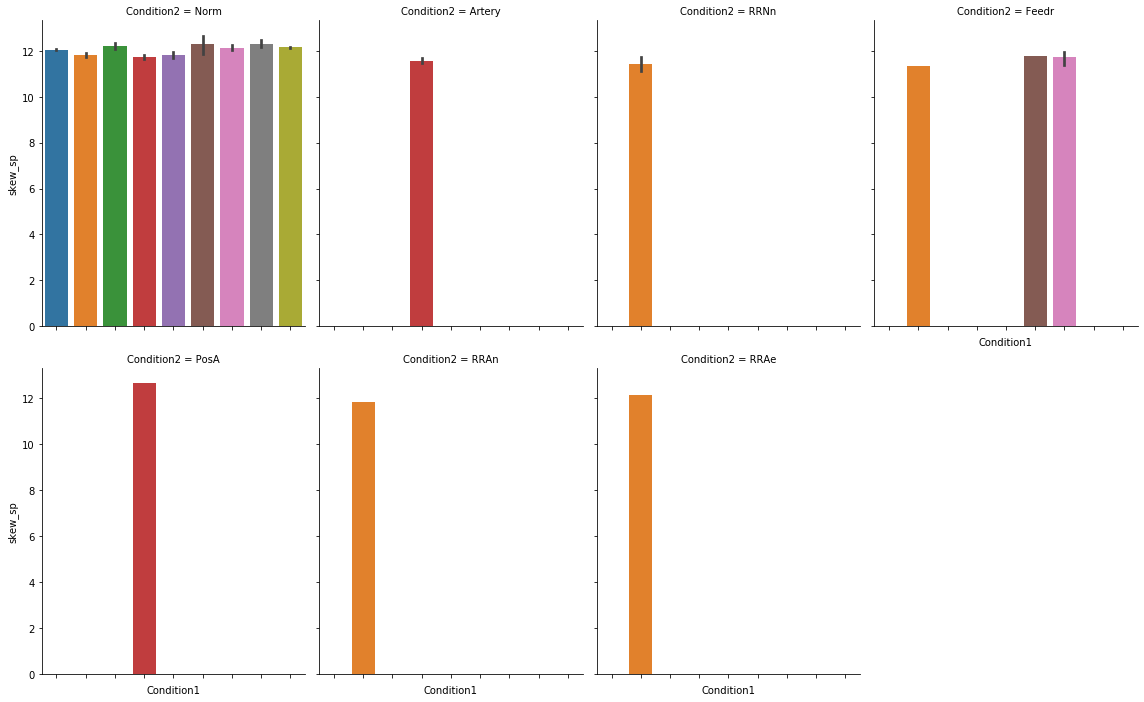

In [48]:
grid=sns.factorplot(x='Condition1',y='skew_sp',col='Condition2',data=train,kind='bar',col_wrap=4,aspect=0.8)
grid.set_xticklabels(rotation=90)

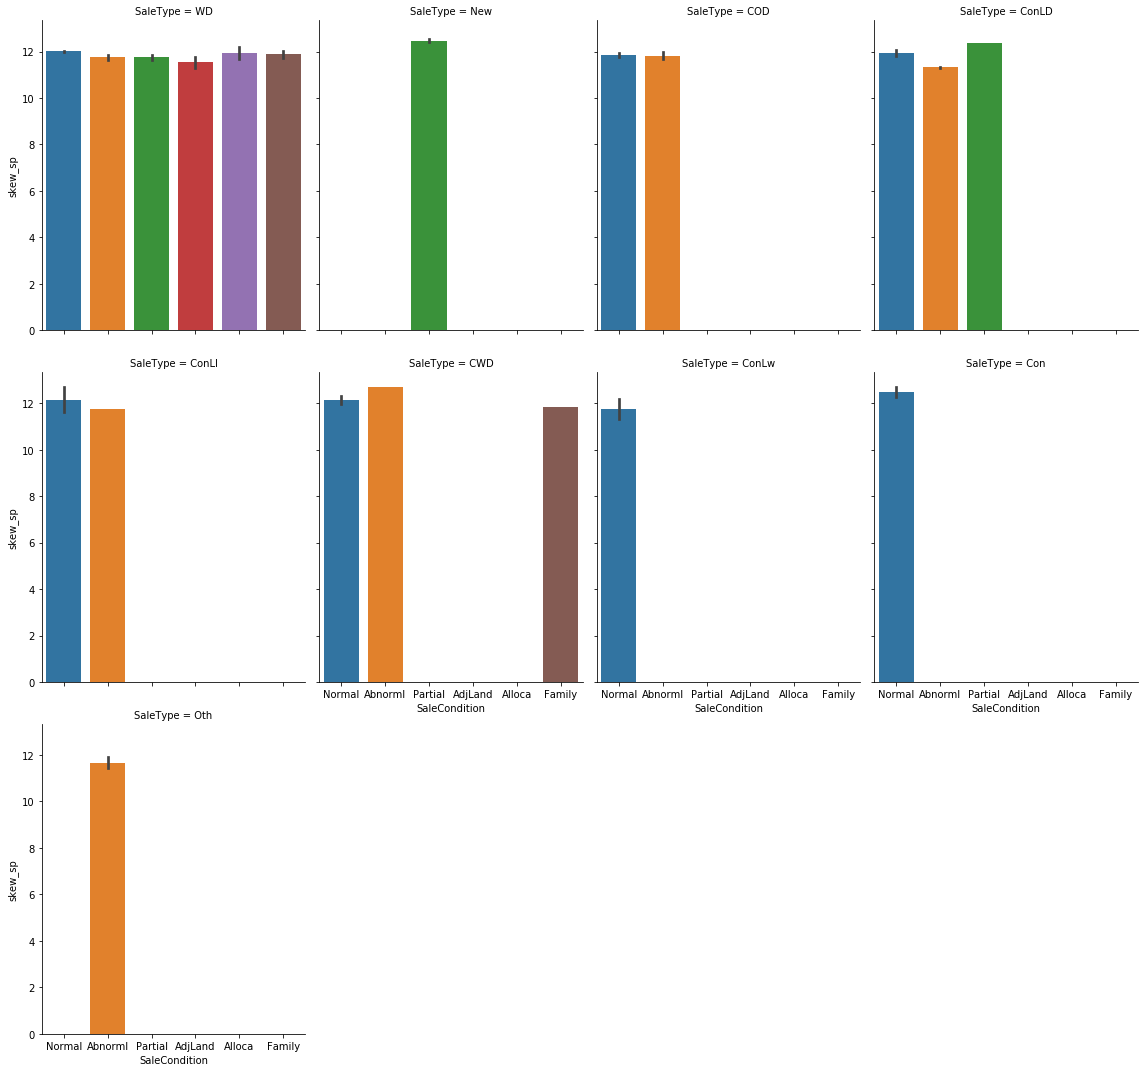

In [50]:
grid=sns.factorplot(x='SaleCondition',y='skew_sp',col='SaleType',data=train,kind='bar',col_wrap=4,aspect=0.8)


Transforming the two categories of street to 1 and 0

In [60]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
train.enc_street.value_counts()

1    1447
0       5
Name: enc_street, dtype: int64

we will now analyze the feature SaleCondition with the sale price

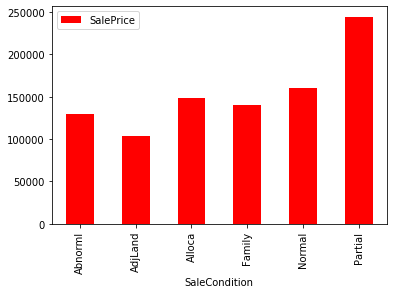

In [64]:
Scondition=train.pivot_table(index='SaleCondition',values='SalePrice',aggfunc=np.median)

Scondition.plot(kind='bar',color='red')

In [67]:
def encode(x):return 1 if x=='Partial' else 0
train['SaleCondition']=train.SaleCondition.apply(encode)
test['SaleCondition']=test.SaleCondition.apply(encode)

In [69]:
train.SaleCondition.value_counts()

0    1331
1     121
Name: SaleCondition, dtype: int64

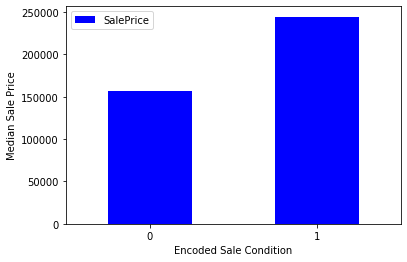

In [70]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

We interpolate the numerical features of the training data

In [73]:
df=train.select_dtypes(include=[np.number]).interpolate().dropna()

In [75]:
sum(df.isnull().sum()!=0)

0

In [76]:
y=np.log(train.SalePrice)
x=df.drop(['SalePrice','Id'],axis=1)

Splitting the data into the training data and test data, to check the quality of  our model

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    x, y, random_state=42, test_size=.25)

In [80]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
lr=ensemble.GradientBoostingRegressor()
model=lr.fit(X_train,y_train)
pred=model.predict(X_test)

print("The R^2 is : ", model.score(X_test,y_test),"\n the RMSE is : ",mean_squared_error(y_test,pred))


The R^2 is :  0.9997590169472738 
 the RMSE is :  3.8148709052942846e-05


Text(0.5, 1.0, 'Linear Regression Model')

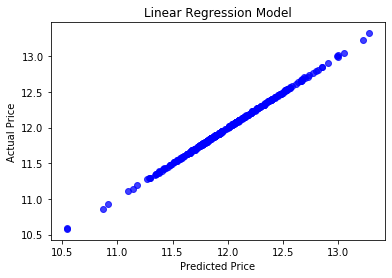

In [81]:
plt.scatter(pred,y_test,alpha=.75,color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

Now we apply the ridge Model

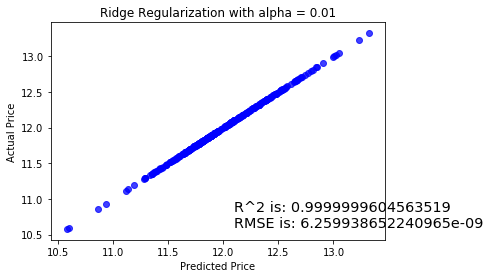

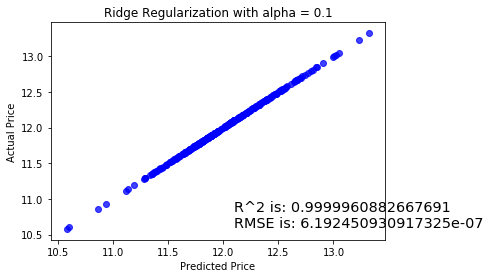

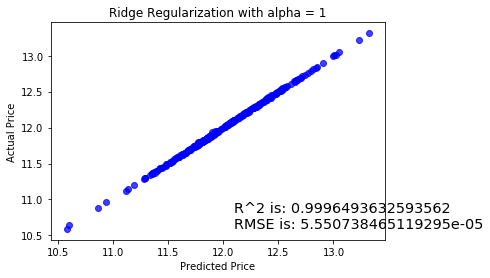

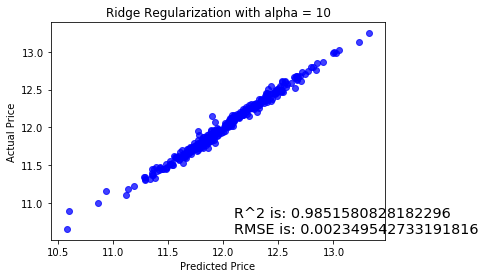

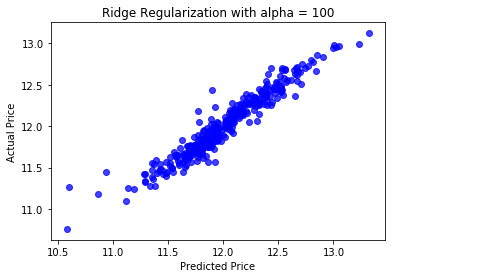

In [83]:
for i in range(-2,3):
    alpha=10**i
    rm=linear_model.Ridge(alpha=alpha)
    rm_model=rm.fit(X_train,y_train)
    rm_pred=rm_model.predict(X_test)
    
    plt.scatter(y_test,rm_pred,alpha=.75,color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(rm_model.score(X_test, y_test),mean_squared_error(y_test, rm_pred))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

now that we know which model we will use ,we can fill the missing data i the test dataframe and apply the model to predict the sales prices

In [112]:
x=df.drop(['SalePrice','Id','skew_sp'],axis=1)
feat=test.select_dtypes(include=[np.number]).interpolate().dropna()
sum(feat.isnull().sum()!=0)

0

In [113]:
sample=feat.drop(['Id'],axis=1)

In [114]:
print(sample.shape)
print(x.shape)
print(y.shape)


(1459, 38)
(1452, 38)
(1452,)


In [115]:
    rm=linear_model.Ridge(alpha=0.01)
    rm_model=rm.fit(x,y)
    rm_pred=rm_model.predict(sample)

In [116]:
rm_pred

array([11.72894866, 11.88850745, 12.0734366 , ..., 12.14406615,
       11.64137217, 12.37103064])

We have to use the exponential function to get the sale prices

In [117]:
finale_prediction=np.exp(rm_pred)

In [121]:
submission=pd.DataFrame()
submission['Id']=test.Id

In [122]:
submission['SalePrice']=finale_prediction
submission.head()

,Id,SalePrice
0,1461,124113.116262
1,1462,145583.844888
2,1463,175156.755736
3,1464,196350.693729
4,1465,178915.593009


In [123]:
submission.to_csv('submission_house_pricing.csv', index=False)